In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline

In [2]:
from functions import *

In [3]:
df = pd.read_csv("HW1_Coords.csv",index_col=0)
df.head()

,X,Y
1,37,52
2,49,49
3,52,64
4,20,26
5,40,30


Input Data is Valid!
Solution is not given!


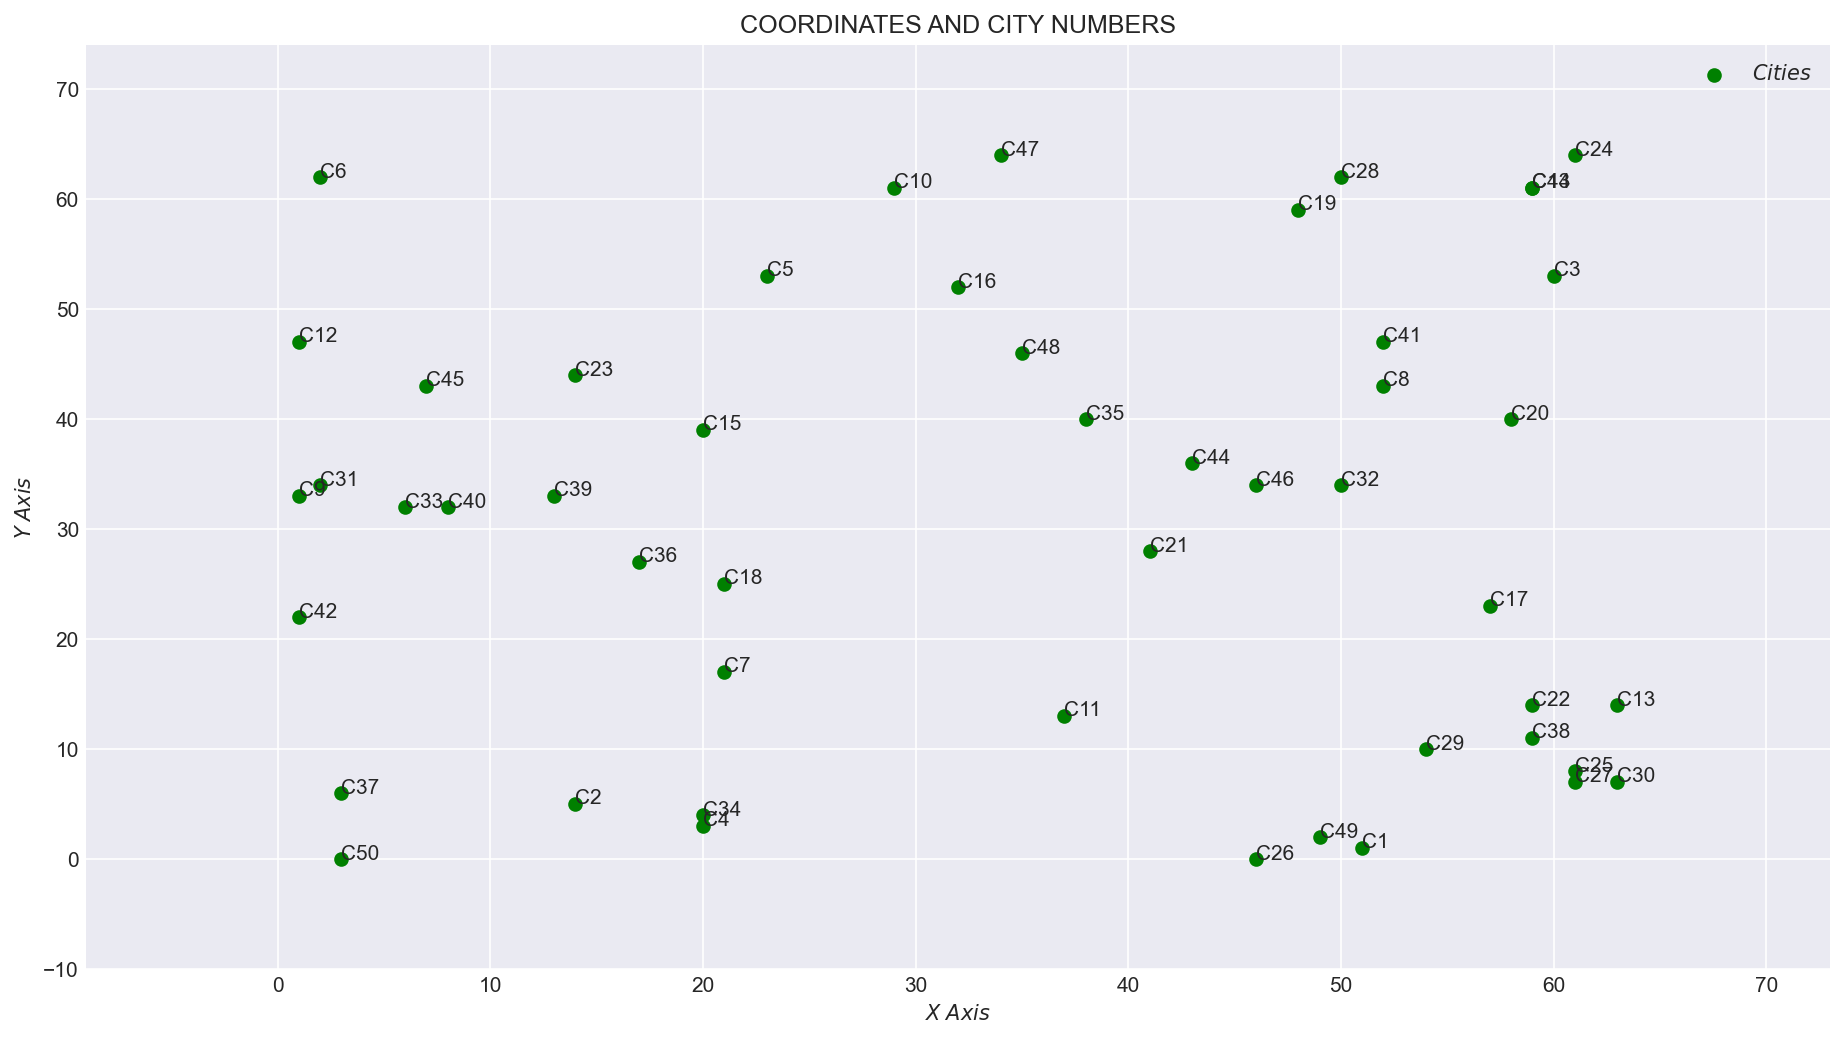

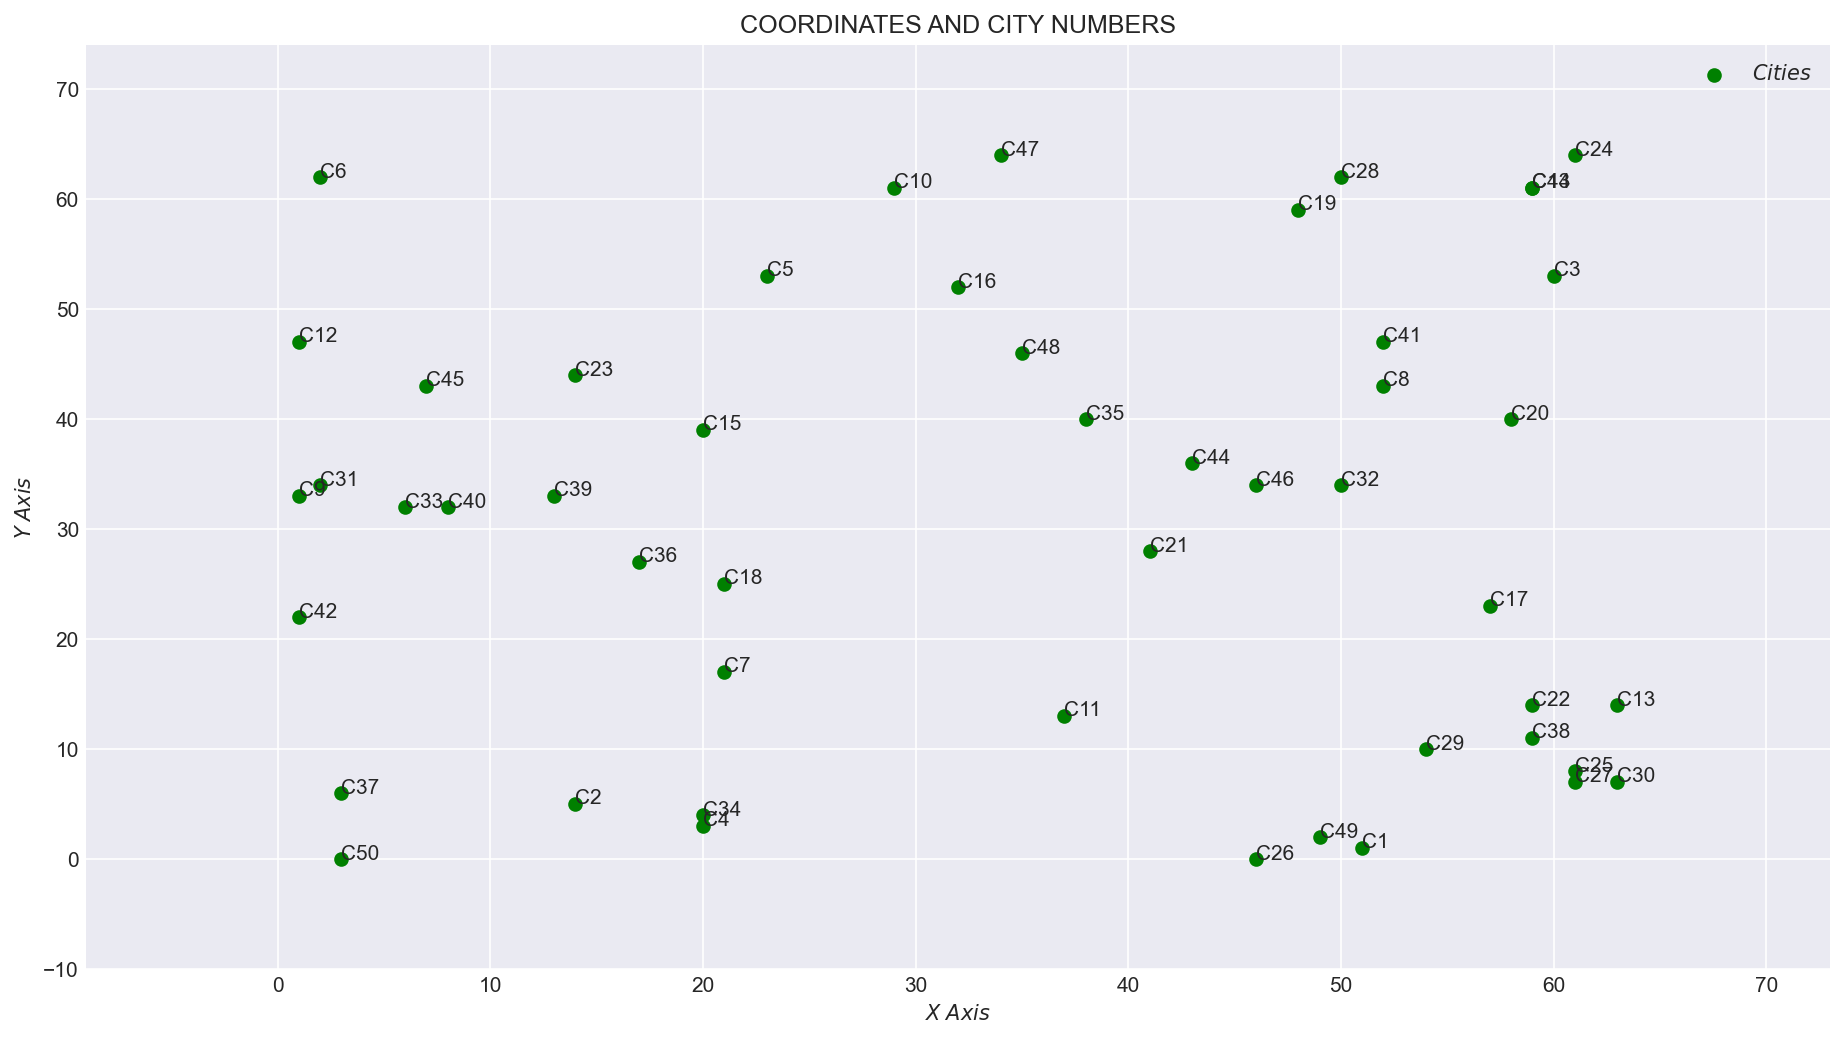

In [4]:
df = Cities.generate_cities(50, [0,70], [0,70], random_seed=42)
cities_obj = Cities(df)
cities_obj.visualize_city_or_sol(save_fig=False)

In [5]:
ConsH = Construction_Heuristics_TSP(df)

Input Data is Valid!


In [6]:
ConsH.random_insertion()

{'sol': array([ 3, 33, 12, 39, 15,  6, 10, 48, 44,  2, 11, 32, 27, 47, 16, 38, 40,
        46, 22, 49, 24, 13, 17,  5, 42, 35, 36, 18, 29, 25, 21,  4, 37, 20,
        26, 41, 30, 23, 31,  7, 50, 34, 45, 14,  1, 28, 19,  9, 43,  8]),
 'obj': 1675.2116447907977}

In [7]:
ConsH.nearest_neighbor(mode="iterate_all")

{'sol': array([ 6, 12, 45, 23, 15, 39, 40, 33, 31,  9, 42, 37, 50,  2, 34,  4,  7,
        18, 36, 21, 46, 44, 35, 48, 16,  5, 10, 47, 19, 28, 14, 43, 24,  3,
        41,  8, 20, 32, 17, 22, 38, 25, 27, 30, 13, 29, 49,  1, 26, 11],
       dtype=int64),
 'obj': 432.66646661847085}

In [8]:
ConsH.nearest_insertion()

{'sol': array([14,  3, 20, 17, 22, 13, 25, 27, 30, 38, 29,  1, 49, 26, 11, 32, 46,
        21, 44, 35, 48, 15, 18,  7, 34,  4,  2, 50, 37, 36, 39, 40, 33, 42,
         9, 31, 23, 45, 12,  6,  5, 10, 47, 16,  8, 41, 19, 28, 24, 43],
       dtype=int64),
 'obj': 453.48055419116486}

In [9]:
ConsH.farthest_insertion()

{'sol': array([24, 37, 14, 50, 43, 49, 45, 46, 18, 47, 34, 41, 15, 13,  6, 11, 35,
         1, 40, 28,  2, 20, 33, 25, 16,  7, 44, 23, 26,  3, 36, 38,  5, 22,
        42, 32, 12, 27, 19, 29, 31, 21, 10, 17,  9,  8, 39, 30, 48,  4],
       dtype=int64),
 'obj': 2644.8432600112124}

In [10]:
sol_dict = ConsH.arbitrary_insertion(random_seed=42)
sol = sol_dict["sol"]
sol_dict

{'sol': array([14,  3, 41,  8, 20, 46, 32, 44, 35, 21, 17, 22, 13, 38, 30, 27, 25,
        29,  1, 49, 26, 11,  4, 34,  2, 50, 37, 42,  7, 18, 36, 39, 40, 33,
         9, 31, 45, 12,  6, 23, 15,  5, 48, 16, 10, 47, 19, 28, 24, 43]),
 'obj': 414.70060188666014}

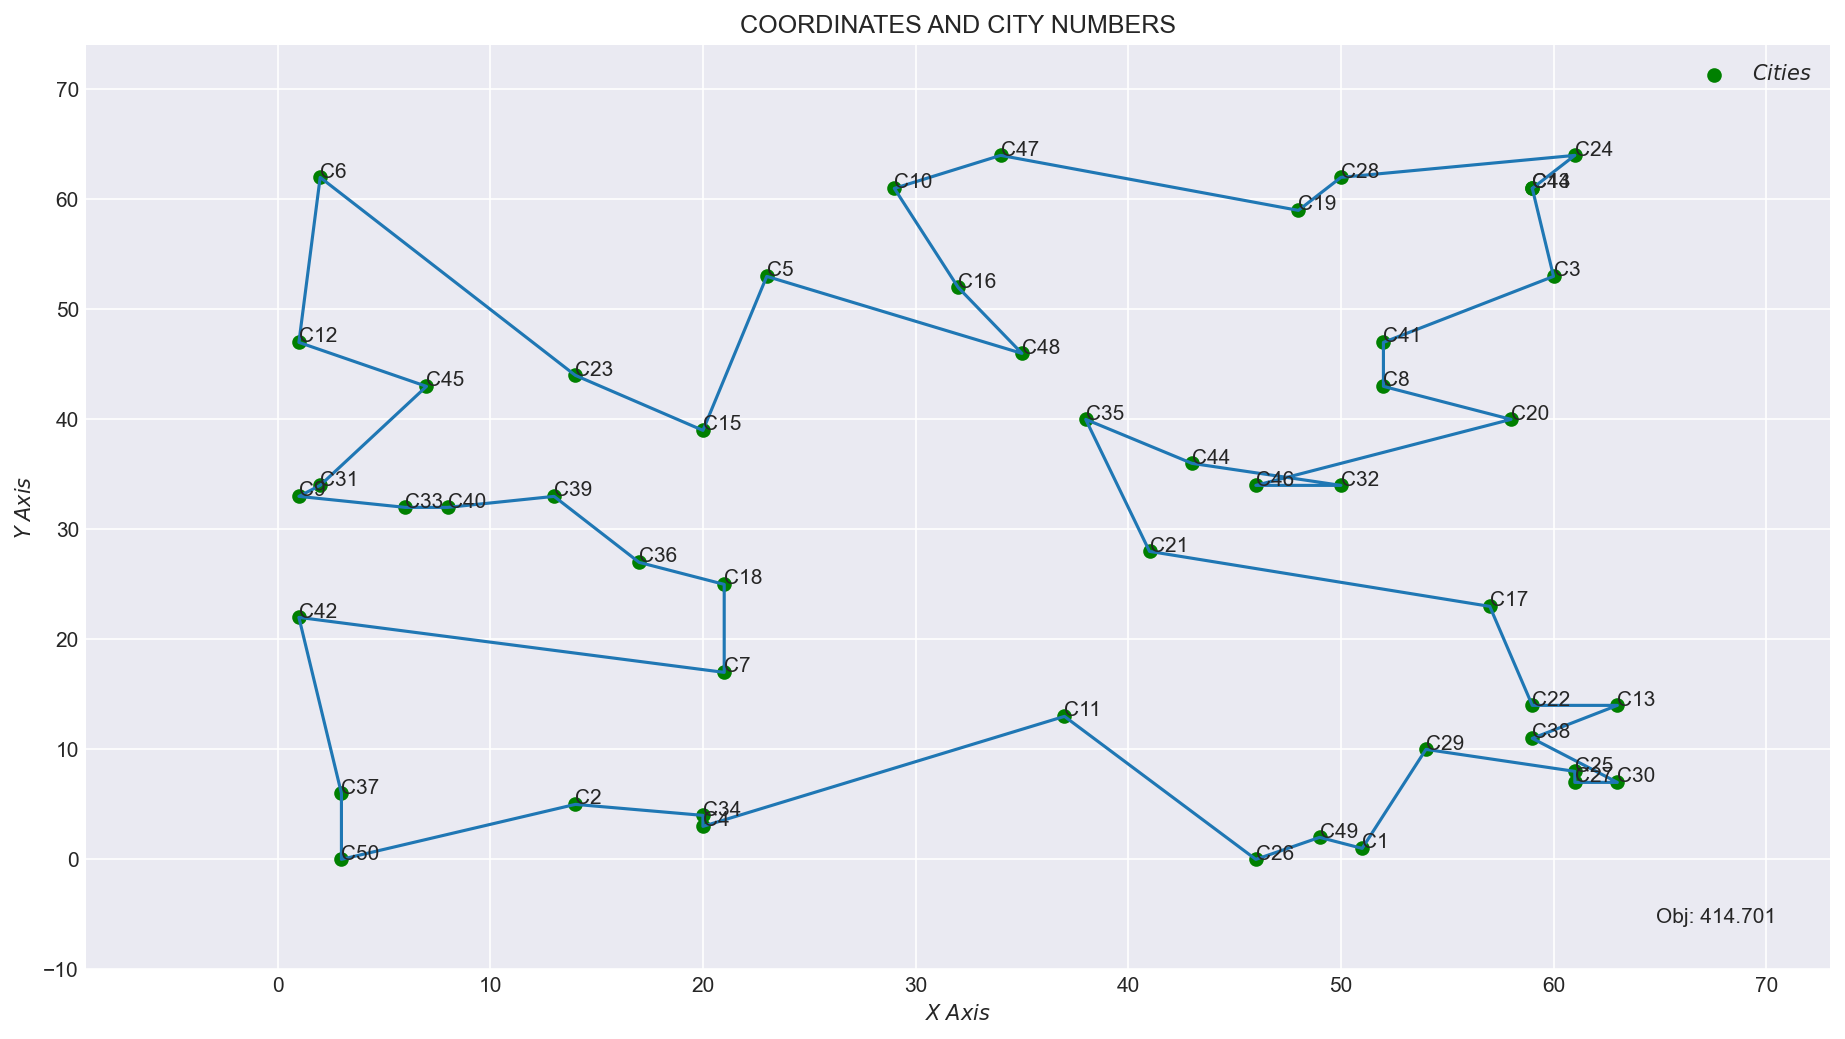

In [11]:
figg = ConsH.visualize_city_or_sol(sol)

In [12]:
ConsH.best_obj

414.70060188666014

In [14]:
result_dict = Construction_Heuristics_TSP(df).nearest_insertion()
print(result_dict["obj"])
print(result_dict["sol"])

Input Data is Valid!
453.48055419116486
[14  3 20 17 22 13 25 27 30 38 29  1 49 26 11 32 46 21 44 35 48 15 18  7
 34  4  2 50 37 36 39 40 33 42  9 31 23 45 12  6  5 10 47 16  8 41 19 28
 24 43]


In [15]:
sa = Meta_Heuristics.Simulated_Annealing(df, init_sol=result_dict["sol"], 
                                                   T_schedule=T_schedules.Geometric(alpha=0.999) , 
                                                    T_start=1500, T_thres=0.1, k=1)
results, best = sa.anneal(return_=True)

Input Data is Valid!


In [18]:
sa.best_result

{'T_s': 0.17758584955914025,
 'sol_s': array([24, 28, 19, 47, 10, 16, 48, 35, 44, 46, 21, 18, 36, 15,  5,  6, 12,
        45, 23, 39, 40, 33, 31,  9, 42, 37, 50,  2,  4, 34,  7, 11, 26, 49,
         1, 29, 38, 25, 27, 30, 13, 22, 17, 32, 20,  8, 41,  3, 14, 43],
       dtype=int64),
 'obj_s': 404.32293390836253}

In [16]:
print(best)

{'T_s': 0.17758584955914025, 'sol_s': array([24, 28, 19, 47, 10, 16, 48, 35, 44, 46, 21, 18, 36, 15,  5,  6, 12,
       45, 23, 39, 40, 33, 31,  9, 42, 37, 50,  2,  4, 34,  7, 11, 26, 49,
        1, 29, 38, 25, 27, 30, 13, 22, 17, 32, 20,  8, 41,  3, 14, 43],
      dtype=int64), 'obj_s': 404.32293390836253}


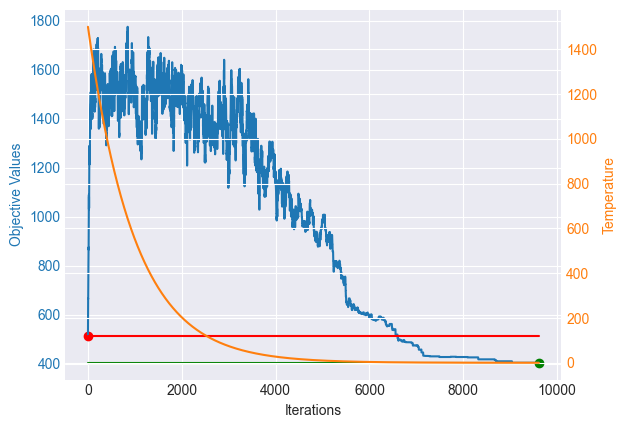

<Figure size 512x384 with 0 Axes>

In [17]:
sa.visualize()

In [ ]:
shc = mt.Meta_Heuristics.Stochastic_Hill_Climbing(df, init_sol=result_dict["sol"], 
                                                   T_schedule=mt.T_schedules.Geometric(alpha=0.999) , 
                                                    T_start=100, T_thres=0.1, k=1)
results, best = shc.climb(return_=True)

In [ ]:
print(best)

In [ ]:
shc.visualize()